In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('dummy_data.csv')

In [ ]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [ ]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [ ]:
df.gender.value_counts()

male          337
non-binary    332
female        331
Name: gender, dtype: int64

In [ ]:
df=df[df['gender']!='non-binary']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           668 non-null    int64 
 1   gender        668 non-null    object
 2   time_spent    668 non-null    int64 
 3   platform      668 non-null    object
 4   interests     668 non-null    object
 5   location      668 non-null    object
 6   demographics  668 non-null    object
 7   profession    668 non-null    object
 8   income        668 non-null    int64 
 9   indebt        668 non-null    bool  
 10  isHomeOwner   668 non-null    bool  
 11  Owns_Car      668 non-null    bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 54.1+ KB


<Axes: title={'center': 'MALE VS FEMALE'}, xlabel='gender'>

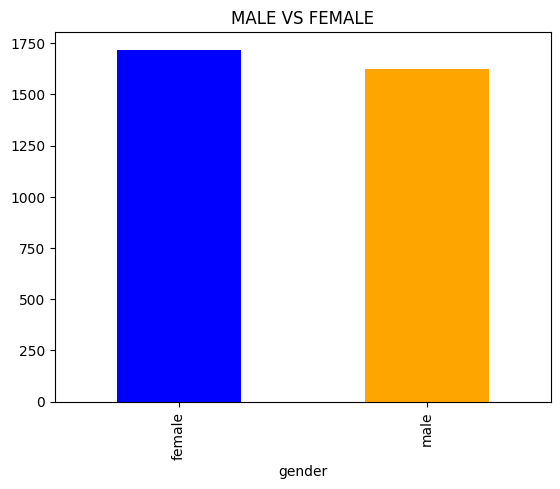

In [ ]:
df.groupby('gender')['time_spent'].sum().plot(kind='bar',title='MALE VS FEMALE',x='Gender',y='Time Spent',color=['blue','orange'])

<Axes: ylabel='Frequency'>

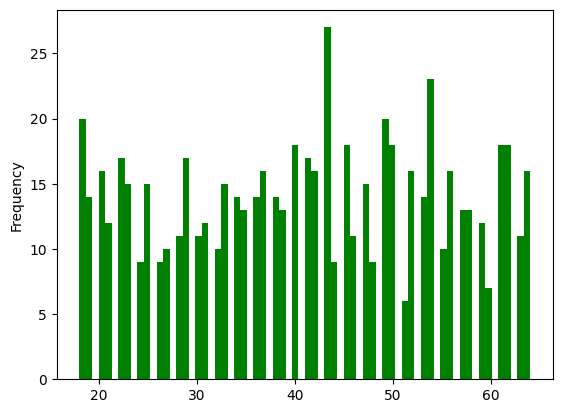

In [ ]:
df.groupby('age')
df['age'].plot(kind='hist',x='age',color='green',bins=70)

<Axes: xlabel='income', ylabel='Count'>

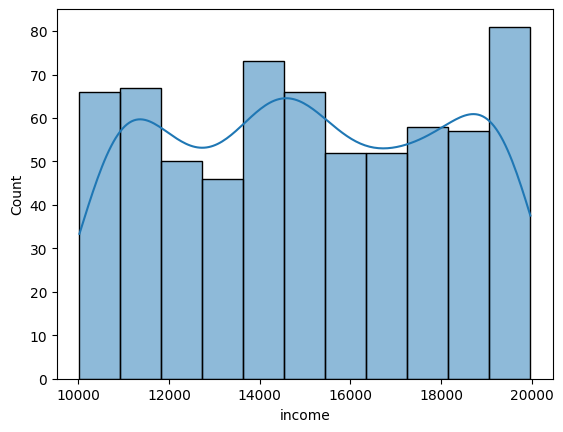

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.histplot(df['income'],kde=True)

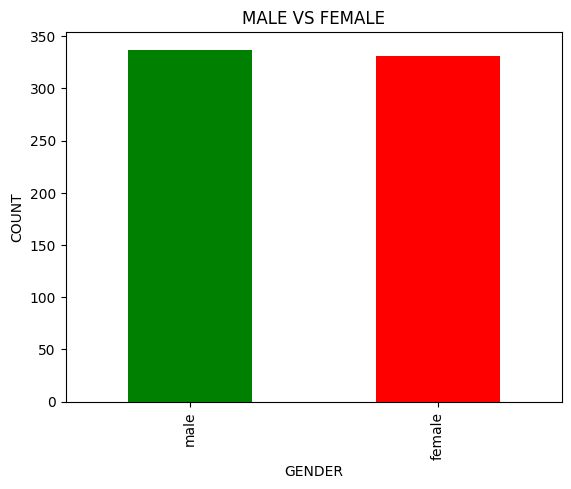

In [ ]:
gender_counts=df.gender.value_counts()
gender_counts.plot(kind='bar',color=['green','red'])
plt.title('MALE VS FEMALE')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()


<Axes: xlabel='demographics', ylabel='count'>

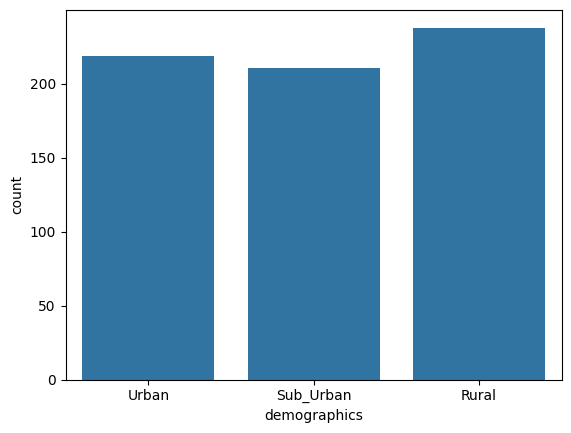

In [ ]:
sns.countplot(x=df['demographics'])

<Axes: xlabel='Owns_Car', ylabel='count'>

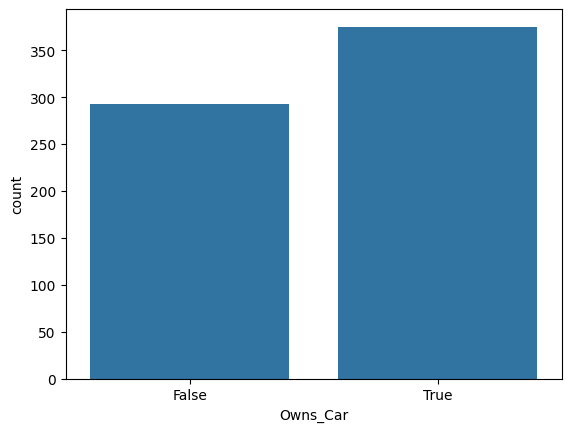

In [ ]:
sns.countplot(x= df['Owns_Car'])


<Axes: xlabel='isHomeOwner', ylabel='count'>

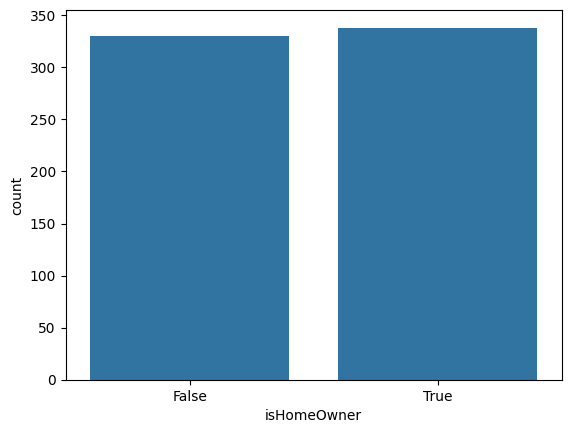

In [ ]:
sns.countplot(x= df['isHomeOwner'])


In [ ]:
categorical_columns=['gender','platform','interests','location','demographics','profession']

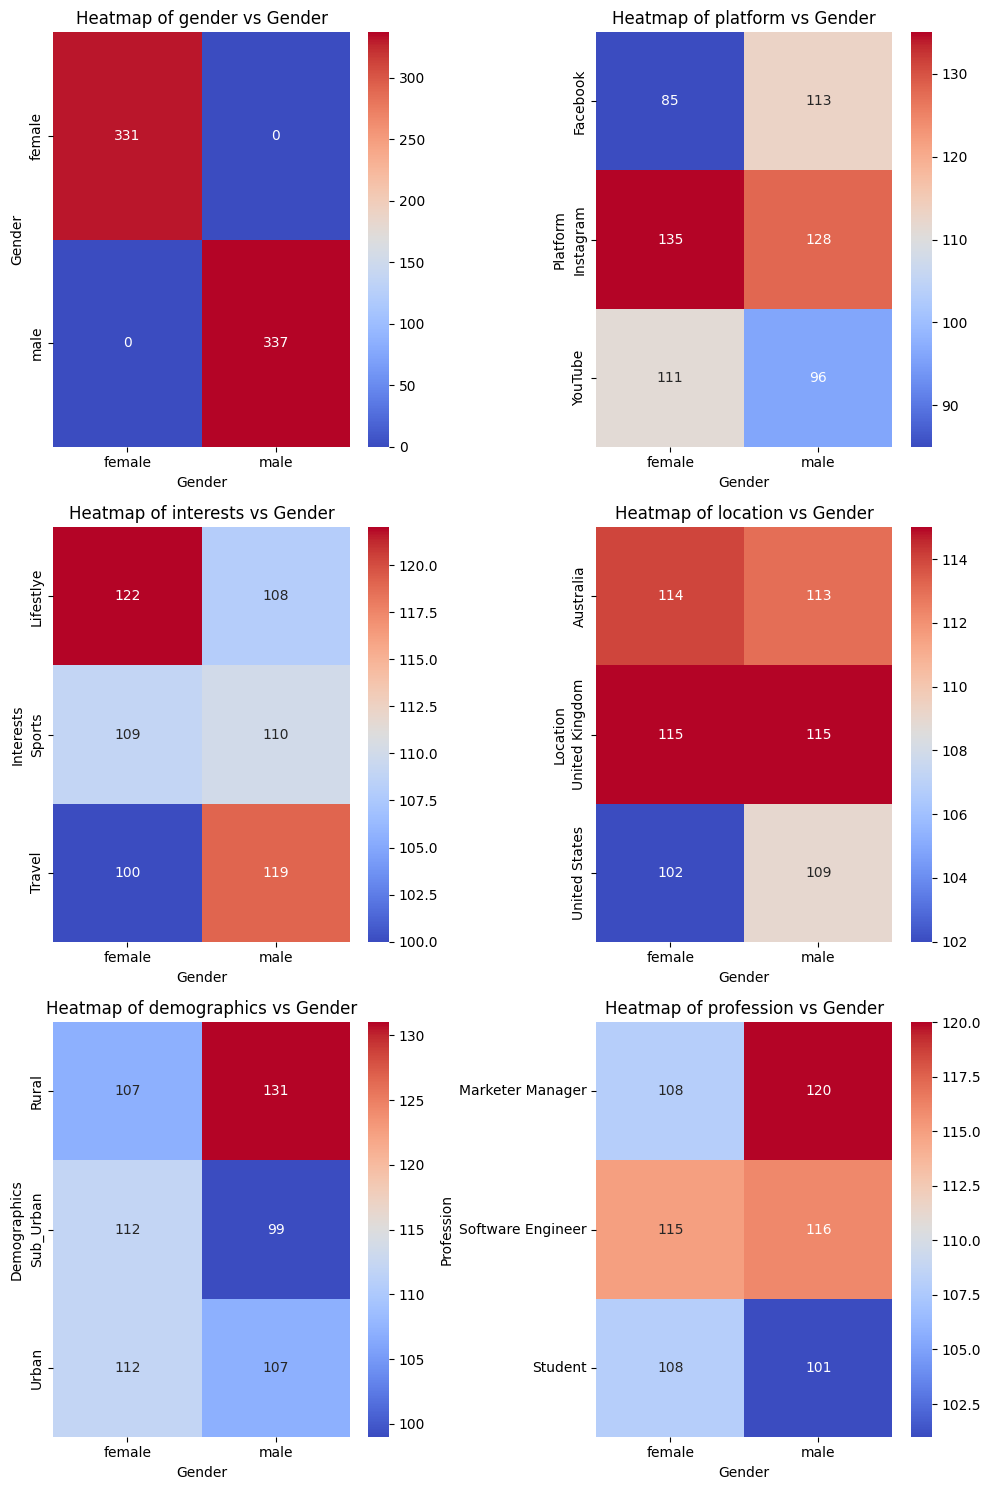

In [ ]:
fig,axes=plt.subplots(3,2,figsize=(10,15))
for i,col in enumerate(categorical_columns):
  cross_tab=pd.crosstab(df[col],df['gender'])
  sns.heatmap(cross_tab,ax=axes[i//2,i%2],cmap='coolwarm',annot=True,fmt='d')


  axes[i // 2, i % 2].set_title(f'Heatmap of {col} vs Gender')
  axes[i // 2, i % 2].set_xlabel('Gender')
  axes[i // 2, i % 2].set_ylabel(col.capitalize())

plt.tight_layout()
plt.show()


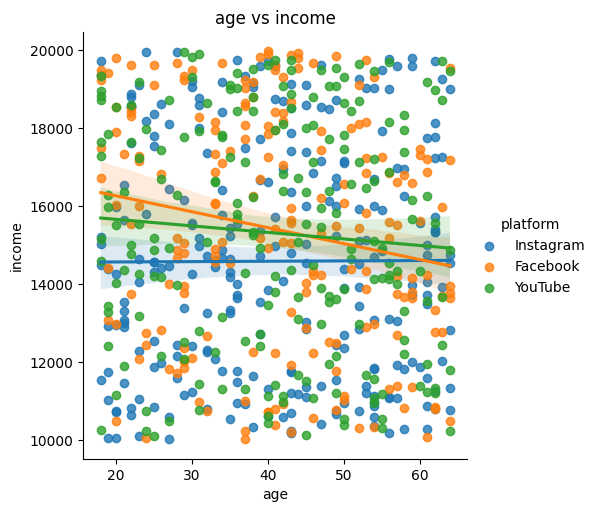

In [ ]:
sns.lmplot(x='age',y='income',data=df,hue='platform')
plt.title('age vs income')
plt.show()

In [ ]:
def screen_time(number):
  if number>6:
    return 'EXTREME'
  elif number>4:
    return 'HIGH'
  elif number>2:
    return 'MODERATE'
  else:
    return 'NORMAL'


In [ ]:
def life_stage(age):
  if age>=60:
    return 'OLD'
  elif age>=40:
    return 'MIDDLE AGE'
  elif age>=18:
    return 'YOUNG'
  else:
    return 'TEENAGE'

In [ ]:
df['screen_time']=df['time_spent'].apply(screen_time)

In [ ]:
df['life_stage']=df['age'].apply(life_stage)

<Axes: xlabel='screen_time', ylabel='count'>

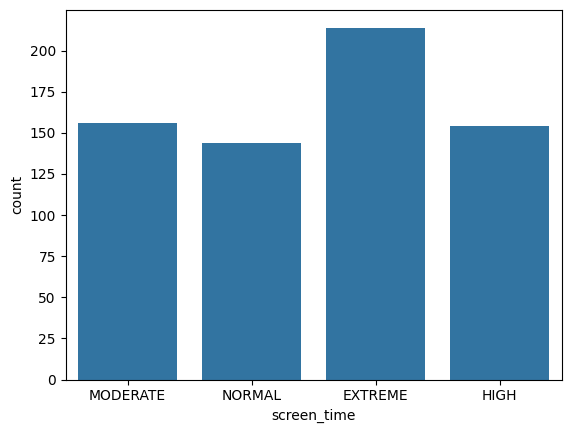

In [ ]:
sns.countplot(x=df['screen_time'])

<Axes: xlabel='life_stage', ylabel='count'>

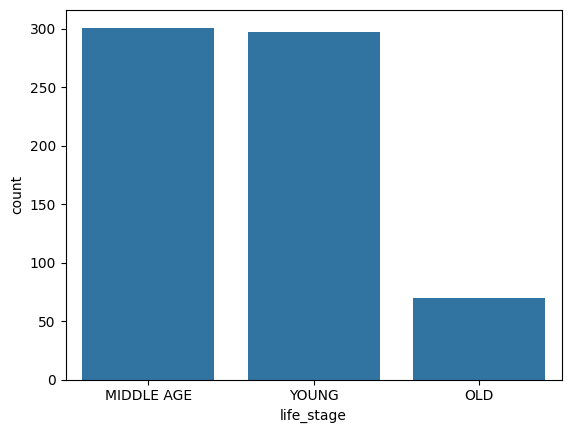

In [ ]:
sns.countplot(x=df['life_stage'])

<Axes: xlabel='time_spent', ylabel='income'>

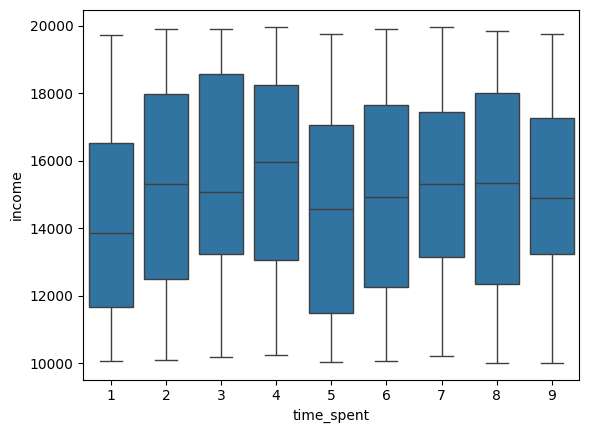

In [ ]:
sns.boxplot(x=df['time_spent'],y=df['income'])

<Axes: xlabel='time_spent', ylabel='age'>

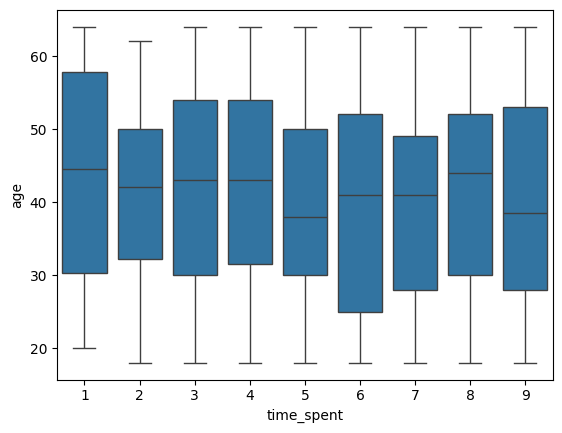

In [ ]:
sns.boxplot(x=df['time_spent'],y=df['age'])

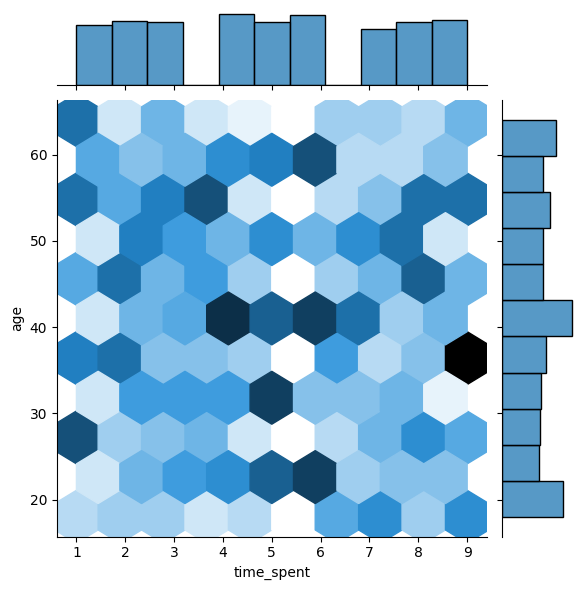

In [ ]:
sns.jointplot(x=df['time_spent'],y=df['age'],kind='hex')

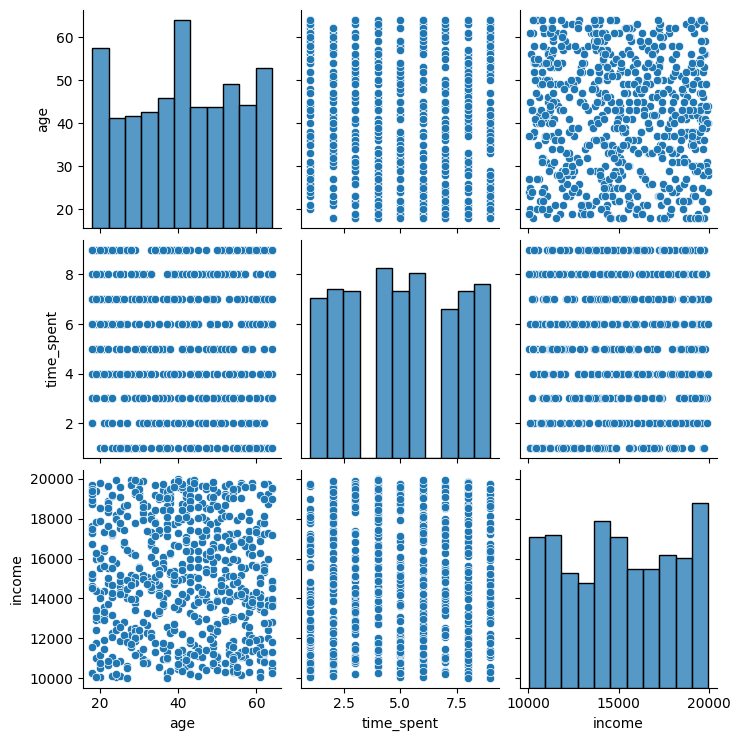

In [ ]:
sns.pairplot(df[['age','time_spent','income']])

<Axes: xlabel='profession', ylabel='income'>

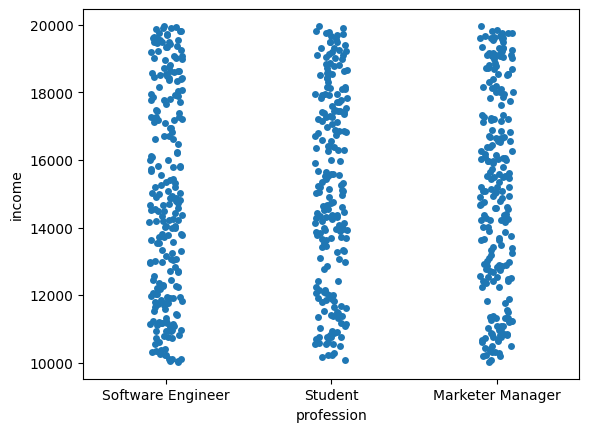

In [ ]:
sns.stripplot(x=df['profession'],y=df['income'])

<Axes: xlabel='profession', ylabel='income'>

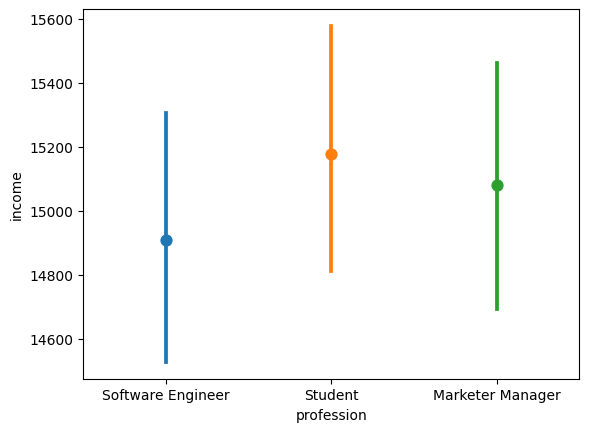

In [ ]:
sns.pointplot(x=df['profession'],y=df['income'],hue=df['profession'])